# First Look to the Data / Cleaning / EDA

## Importance of Sentiment Analysis

Sentiment analysis (also known as opinion mining or emotion AI) means text analysis with natural language processing. It is generally applied to [voice of the customer](https://en.wikipedia.org/wiki/Voice_of_the_customer) concepts such as reviews, surveys responses, social media. With sentiment analysis, positivity or negativity of text can be understood easily and quickly. As an example, politicians use this method to classify tweets about themselves for taking action. It is very important for companies also especially which sell their products online. In online stores, people do not have a chance to touch or see the products. Maybe the product is available in the market and you bought the same brand and same version of it online. But, when it is delivered you, it can be different than what you imagine still. So, customer experiences and voice of customer materials are getting more imporant for e-commerce. To increase customer satisfaction and to take strategic decisions, e-commerce companies must give more importance to reviews of customers. It is not easy to read every review and compare every product for taking action. Sentiment analysis makes it easier. With the sentiment analysis, reviews can be classified as positive and negative. It helps the company for quick and easy product analysis. 

More information about sentiment analysis can be found [here](https://en.wikipedia.org/wiki/Sentiment_analysis). There is an example from customer feedbacks below;


![title](images/example.png) 

*Image source : https://getthematic.com/insights/sentiment-analysis/*

## Sentiment Analysis of Kindle Store Reviews

In this project, I will work on sentiment analysis of Kindle Store reviews in Amazon. I choose this dataset because it is more easy to buy and read a book with Kindle. Going to the book store, finding a book which you like need more time than reaching every book from your tablet. Even people do not have to buy a Kindle to read online books from Kindle Store. When you download the Kindle App, you can reach all online books in Kindle Store from your laptop, phone or other devices.

## Aim of This Notebook

Aim of this notebook is data understanding, preparation and exploration. In this notebook, I will download data, merge another column from different dataset and try to understand the columns interactions with each others and target with the help of visualizations. I will also discover which columns need to clean. Then, I will prepare my data to modeling. 

At the end of the this notebook, all explorations and findings which are obtained from the first look of the data, can be found as a list.

## Data Source

The data is obtained from github.io page of [UC San Diego Computer Science and Engineering Department academic staff](https://nijianmo.github.io/amazon/index.html#subsets). Dataset contains product reviews and metadata, including 142.8 million reviews from May 1996 to July 2014. To download easily, some academic staff in computer science department at UCSD divided the data according to product categories. Kindle Store data is consisted of 5,722,988 reviews for 493,859 products. I prefer to use 5-core sample dataset(such that each of the remaining users and items have at least 5 reviews) and metadata for Kindle Store. The reasons to choose 5-core data is that continuous users contains more information than single reviewers. To reach and download metadata, people have to fill the form and submit it. 

The code of the getting data can be found [Getting_Data_from_json_Files notebook](https://github.com/ezgigm/sentiment_analysis_and_product_recommendation/blob/master/notebooks/Getting_Data_from_json_Files%20.ipynb).

My main data contains 2,222,983 rows and 12 columns. Also, I used the metadata to find the corresponding names of the books from product ID. 

# Importing Necessary Libraries

In [2]:
# dataframe and series 
import pandas as pd
import numpy as np

# sklearn imports for modeling part
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.model_selection import train_test_split

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import confusion_matrix

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

import nltk
from nltk.corpus import stopwords


In [3]:
import torch
from torchtext import data
from torchtext import datasets

In [4]:
pd.options.display.max_columns=100 # To see the hidden columns in dataframe

# Importing Data from .csv

In [5]:
df = pd.read_csv('kindle_data.csv', low_memory=False) #getting main data

In [6]:
df_meta = pd.read_csv('kindle_meta_last.csv', low_memory=False) #getting metadata for title names

In [181]:
df.head() #first look to df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"07 3, 2014",A2LSKD2H9U8N0J,B000FA5KK0,{'Format:': ' Kindle Edition'},sandra sue marsolek,"pretty good story, a little exaggerated, but I...",pretty good story,1404345600,NaN,NaN
1,5.0,True,"05 26, 2014",A2QP13XTJND1QS,B000FA5KK0,{'Format:': ' Kindle Edition'},Tpl,"If you've read other max brand westerns, you k...",A very good book,1401062400,NaN,NaN
2,5.0,True,"09 16, 2016",A8WQ7MAG3HFOZ,B000FA5KK0,{'Format:': ' Kindle Edition'},Alverne F. Anderson,"Love Max, always a fun twist",Five Stars,1473984000,NaN,NaN
3,5.0,True,"03 3, 2016",A1E0MODSRYP7O,B000FA5KK0,{'Format:': ' Kindle Edition'},Jeff,"As usual for him, a good book",a good,1456963200,NaN,NaN
4,5.0,True,"09 10, 2015",AYUTCGVSM1H7T,B000FA5KK0,{'Format:': ' Kindle Edition'},DEHS - EddyRapcon,MB is one of the original western writers and ...,A Western,1441843200,2,NaN


In [7]:
# merging the metadata title column to main dataset
df = pd.merge(df,df_meta[['title','asin']],on=['asin'], how='left') 

In [8]:
df.shape #to see the number of columns and rows

(2222983, 13)

In [185]:
df.isna().sum() #to see null values

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style               52617
reviewerName          142
reviewText            410
summary              1757
unixReviewTime          0
vote              1931032
image             2221618
title               20669
dtype: int64

Most important columns for my project are overall and reviewText. So I have to drop the nulls for these two columns.

In [9]:
df.dropna(subset=['reviewText'], inplace=True) #droping null's in reviews

In [187]:
df.isna().sum() # to check

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style               52600
reviewerName          142
reviewText              0
summary              1735
unixReviewTime          0
vote              1930627
image             2221213
title               20658
dtype: int64

# Deeper Look to Columns

To decide cleaning and preparing process, I will look deeper to columns.

In [188]:
df.info(verbose=True, null_counts=True) #to see the type of columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2222573 entries, 0 to 2222982
Data columns (total 13 columns):
overall           2222573 non-null float64
verified          2222573 non-null bool
reviewTime        2222573 non-null object
reviewerID        2222573 non-null object
asin              2222573 non-null object
style             2169973 non-null object
reviewerName      2222431 non-null object
reviewText        2222573 non-null object
summary           2220838 non-null object
unixReviewTime    2222573 non-null int64
vote              291946 non-null object
image             1360 non-null object
title             2201915 non-null object
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 222.6+ MB


In [10]:
df['overall'].value_counts() 

5.0    1353344
4.0     556256
3.0     197919
2.0      66888
1.0      48166
Name: overall, dtype: int64

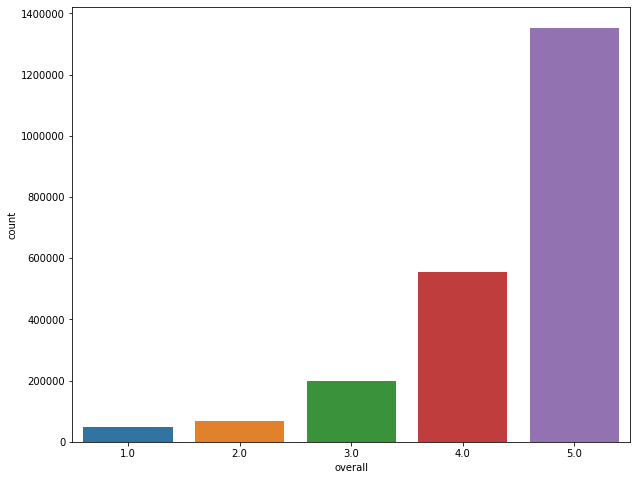

In [205]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='overall', data=df)

Mostly ratings in dataset consist of good reviews such as 4 and 5. It is seen that our target is imbalanced.

In [11]:
df['verified'].value_counts()

True     1417690
False     804883
Name: verified, dtype: int64

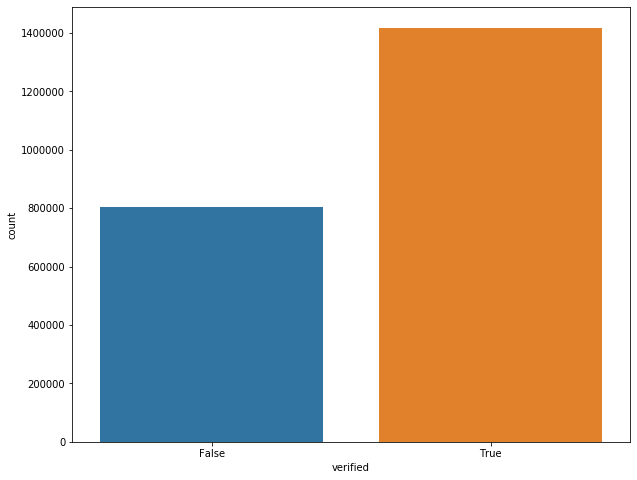

In [207]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='verified', data=df)

Nearly, 64% of reviews are verified by Amazon in our data. The verification of reviews needs time also, the fake review detection is not the topic of this project so, I assume that non-verified reviews have not been verified yet by Amazon. But, by the time they will be verified, so, I will not change anything in this column.

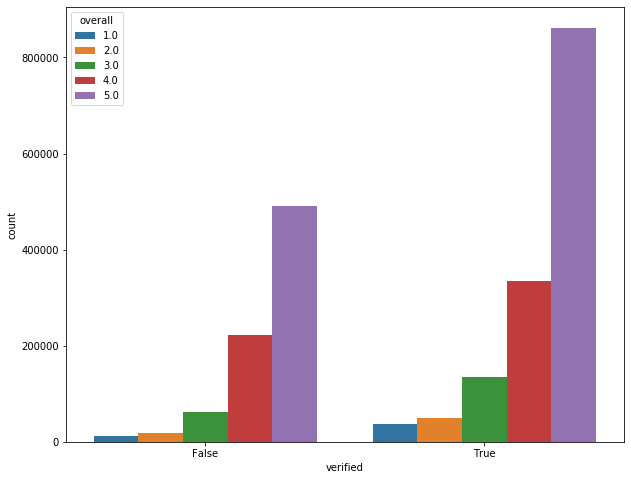

In [206]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='verified', hue="overall", data=df)

The distribution of ratings are nearly same in verified and non-verified reviews.

In [194]:
df['reviewTime'].nunique()

4838

Review time is daily-based in our data. So, it means that data is collected from 4828 different days.

### Converting Data from String to Datetime to Divide Day, Month and Years

In [198]:
df["reviewTime"] = pd.to_datetime(df["reviewTime"]) # convert to datetime

In [199]:
# to convert reviewTime column to day, month and year
df['day'] =df['reviewTime'].dt.day
df['month'] =df['reviewTime'].dt.month 
df['year'] =df['reviewTime'].dt.year

### Looking to Years

In [19]:
df['year'].value_counts()

2015    615680
2016    524890
2014    486926
2013    247913
2017    185370
2018     75655
2012     63467
2011     16685
2010      2583
2009       914
2008       857
2007       410
2005       283
2006       281
2004       178
2003       160
2002       113
2001        97
2000        94
1999        14
1998         2
1997         1
Name: year, dtype: int64

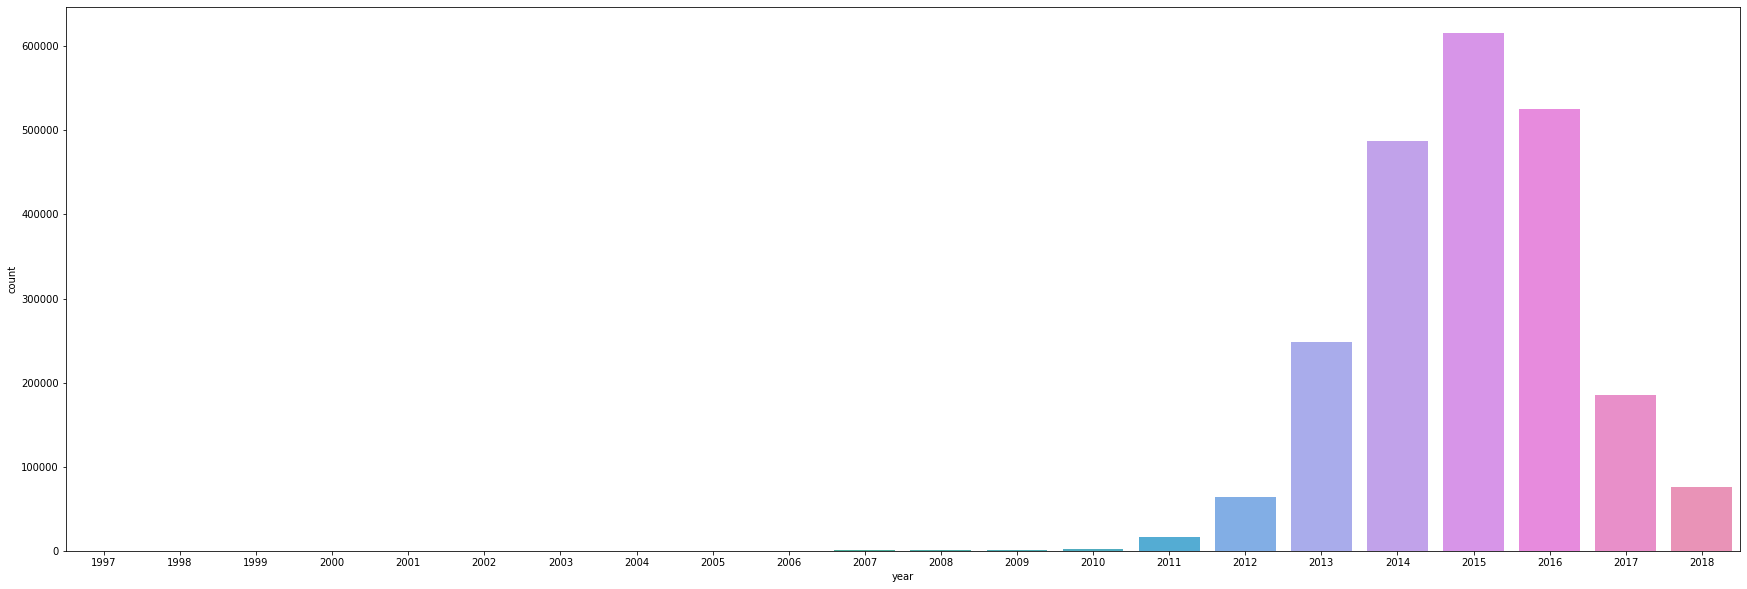

In [208]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='year', data=df)

Our data is consists of 21 years. From the graph, it is obviously seen that mostly data is obtained from recent years. It helps us to build more accurate model for future.

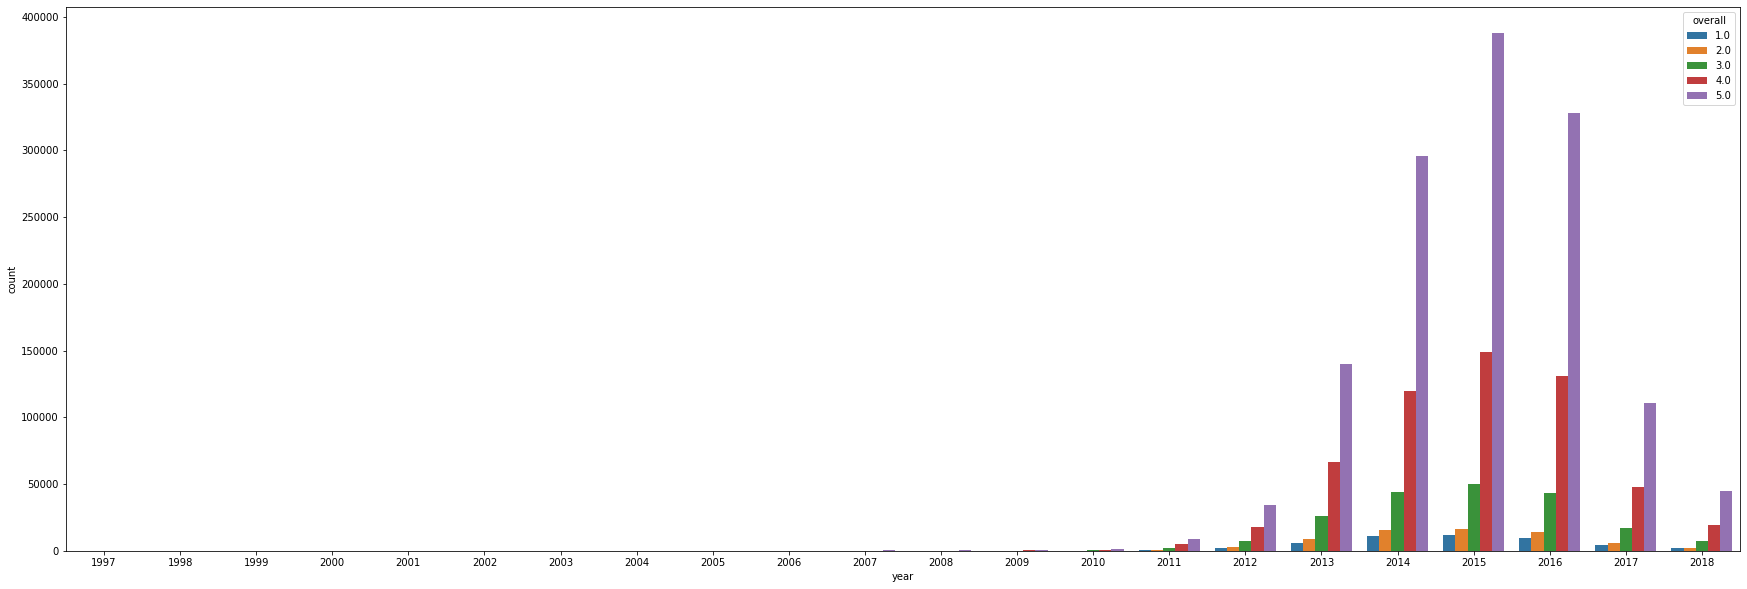

In [209]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='year', hue='overall', data=df)

Some years have higher good ratings.

### Looking to Months

In [21]:
df['month'].value_counts()

3     205772
1     200076
5     197691
4     193928
6     192535
7     183858
8     180840
2     180755
12    174977
11    171548
10    171075
9     169518
Name: month, dtype: int64

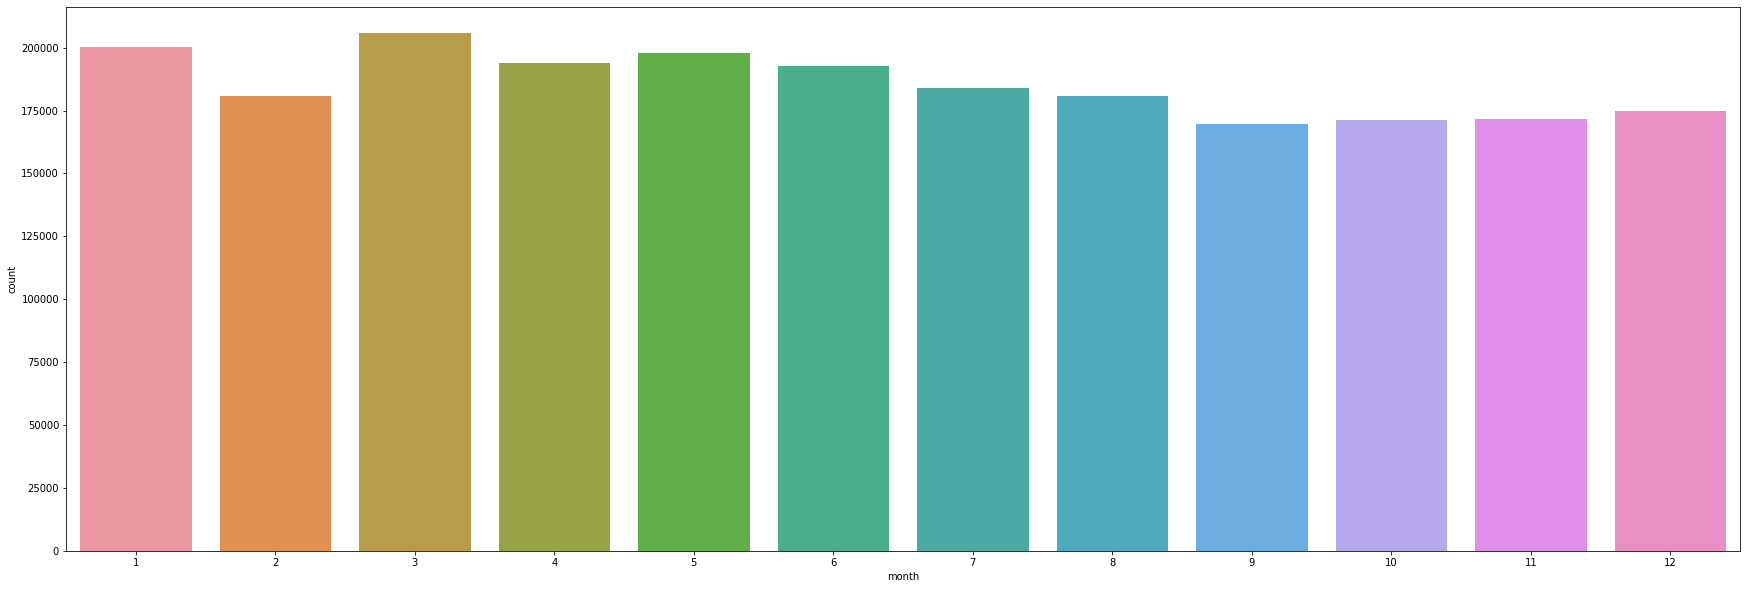

In [210]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='month',data=df)

Mainly, we have similar rating number for each month in our data.

In [33]:
df.groupby('month')['overall'].mean()

month
1     4.394415
2     4.397682
3     4.405575
4     4.397560
5     4.400195
6     4.396328
7     4.382431
8     4.378887
9     4.385304
10    4.398439
11    4.406213
12    4.390817
Name: overall, dtype: float64

Each month has similar rating average.

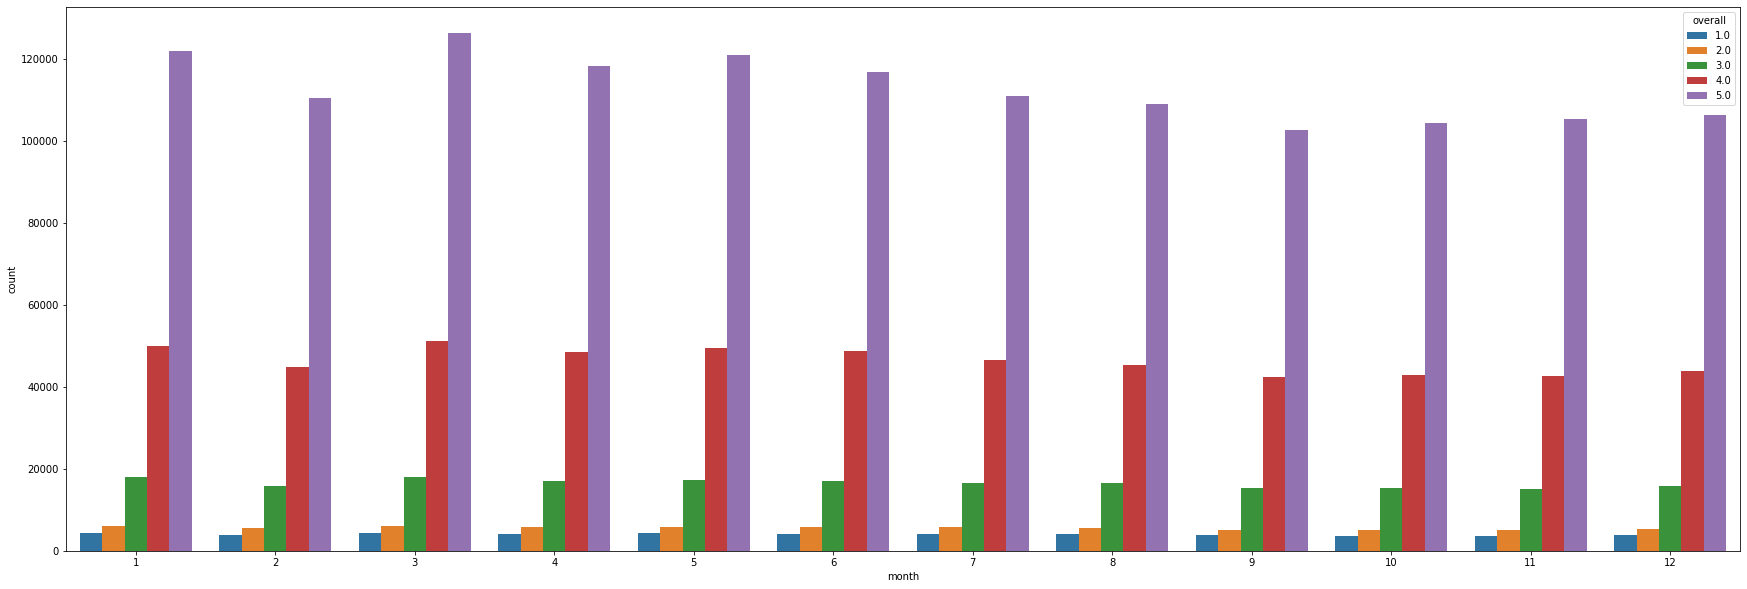

In [26]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='month', hue="overall", data=df)

Each month has similar rating distribution.

# Looking to Days

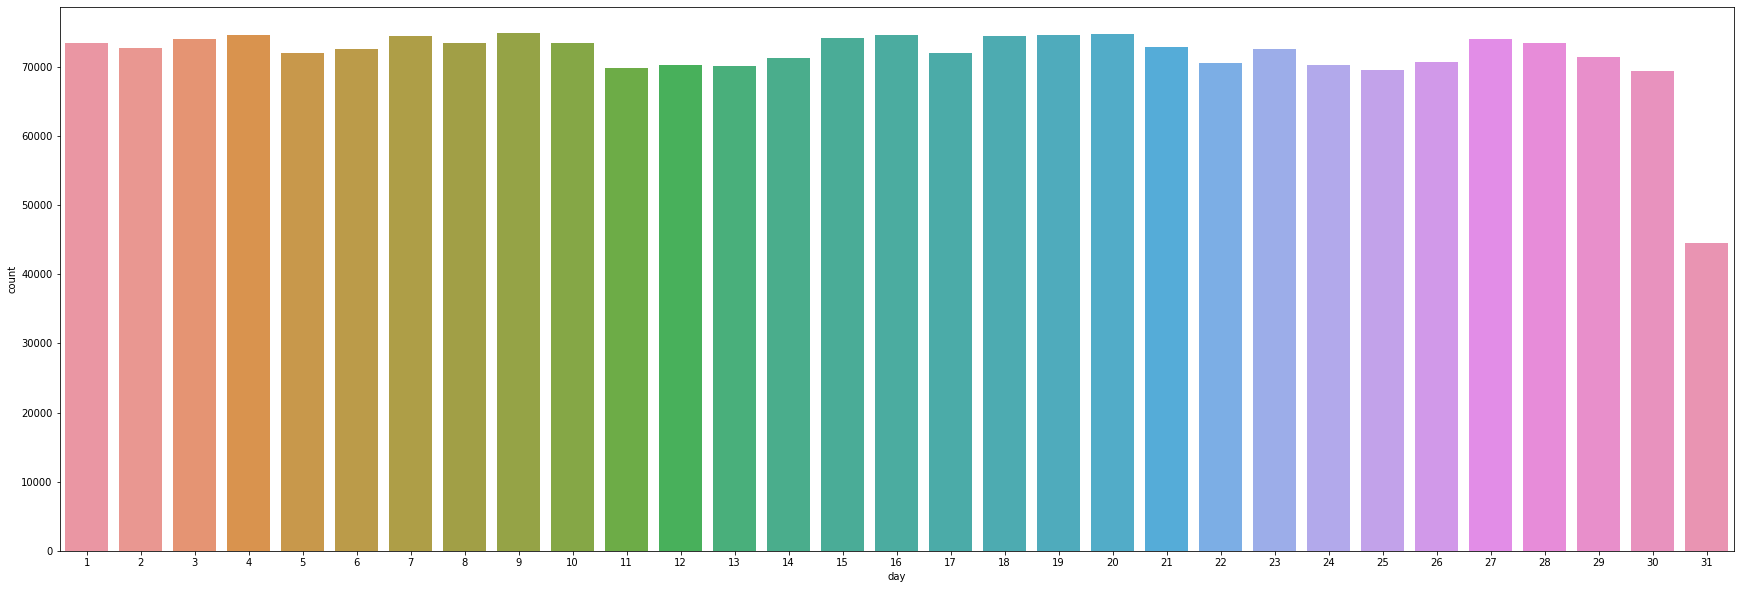

In [212]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='day',data=df)

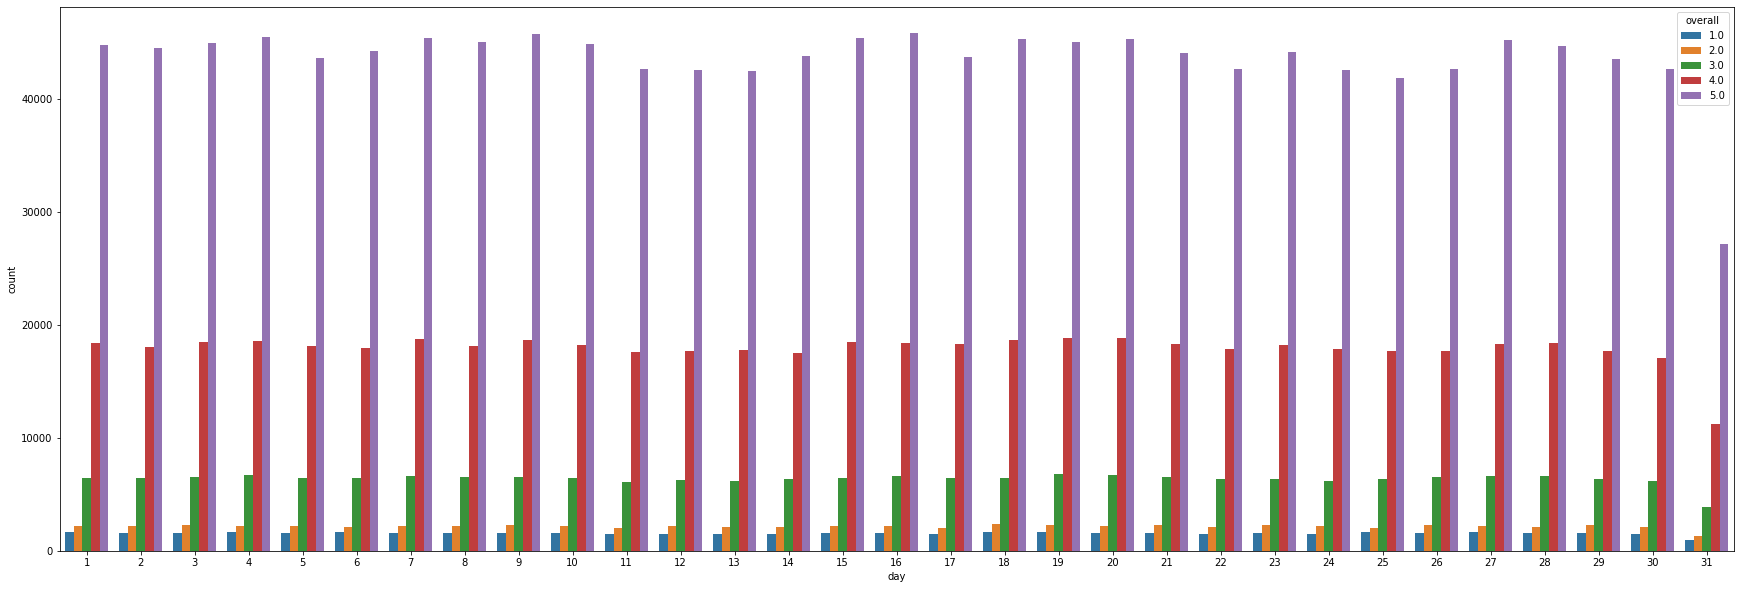

In [28]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='day', hue="overall", data=df)

According to plots above, our data distribution is nearly same for each day, except 31st. Because, every month do not have 31th day. This is also a good indicator for reliability for our data.

### Looking to Reviewers

In [213]:
df['reviewerID'].nunique()

139815

There are 139815 different ID for reviews in this data.

In [35]:
df['reviewerName'].nunique()

102635

Normally, reviewer ID must be same reviewer name but name is less than ID. It means that some people use same names with each other. So, reviewer ID column contains more information than name column. So, I will drop this column. 

In [215]:
df.drop(columns=['reviewerName'],inplace=True) #droping reviewername column

### Looking to Reviewers According to Ratings and Rated Books

In [66]:
df.groupby('reviewerID')['overall'].mean().sort_values(ascending=False).head(100)

reviewerID
A3ES0P8SR1RZ4N    5.0
A35X41LLPO5ABN    5.0
A35X23NWD55TPK    5.0
A35X22F6XM7TQ9    5.0
A35X0P9G1SRYD     5.0
                 ... 
A35U8NE1FV9FKH    5.0
A35TXH5HL73IOM    5.0
A35TVBOBQ1TSP7    5.0
A35TUXRBAV2P1S    5.0
A35TSS9WZ10RIV    5.0
Name: overall, Length: 100, dtype: float64

Top 100 head rating averages are 5. But, it does not give good idea to us. Because maybe they just rated 5 books as 5. But, there are many user which rated more than 500 books.

In [70]:
df.groupby('reviewerID')['asin'].count().sort_values(ascending=False).head(100)

reviewerID
A1JLU5H1CCENWX    1377
A328S9RN3U5M68    1234
A13QTZ8CIMHHG4    1011
A3GWE80SUGORJD    1007
A2YJ8VP1SSHJ7      931
                  ... 
A3Q9ZYNO1MXQDW     432
A2S5EPJ451WL3I     431
A2UQGX6YMQ5BAL     427
AW7JJRAMYZY1X      425
A1QDU32SAI8LO2     425
Name: asin, Length: 100, dtype: int64

Each user, who is in the top 100 according to rate count, have more than 400 reviews. 'asin' shows the book ID's. So, we can count books according to 'asin' column.

### Looking to Top 3 User According to Review Number

In [82]:
df.loc[df['reviewerID']=='A1JLU5H1CCENWX'].groupby('overall')['asin'].count()

overall
3.0       7
4.0      75
5.0    1295
Name: asin, dtype: int64

In [79]:
df.loc[df['reviewerID']=='A328S9RN3U5M68'].groupby('overall')['asin'].count()

overall
3.0     13
4.0    248
5.0    973
Name: asin, dtype: int64

In [81]:
df.loc[df['reviewerID']=='A13QTZ8CIMHHG4'].groupby('overall')['asin'].count()

overall
2.0      9
3.0    282
4.0    490
5.0    230
Name: asin, dtype: int64

Although, top 2 user only have 3,4 and 5 rating, 3rd one has 2 also.

### Looking to Books

In [83]:
df['asin'].nunique() #showing number of books in data

98824

We will look at the books according to number of reviews. Because only rating does not give reliably results such as 5 average rating book with 5 reviews vs. 4.8 average rating book with 1000 reviews.

# 8 Reviews with 5.0 Average Rating vs 2217 Reviews with 4.3 Average Rating 

In [309]:
df.groupby('asin')['overall'].mean().sort_values(ascending=False).head(10)

asin
B0176NQRQE    5.0
B013BH2N0I    5.0
B00JM2H3CA    5.0
B00JLJ0FZ6    5.0
B00JL2OACM    5.0
B00JKT2Y10    5.0
B00JKT2RA8    5.0
B00JKPOKHK    5.0
B00JKO0HSM    5.0
B00JKO0F5W    5.0
Name: overall, dtype: float64

In [223]:
df['asin'].value_counts().head(10)

B00YN6XHMU    2217
B00C2WDD5I    1461
B00ESJ3S94    1327
B015BIHKH6    1249
B00IJYII4E     808
B00EV9LSJI     772
B00ABLJ5X6     762
B0142IHZPI     761
B00WGXCP1G     744
B004KKY782     720
Name: asin, dtype: int64

In [311]:
df.loc[df['asin']=='B0176NQRQE'].groupby('overall').count() # according to review avg.

,verified,reviewTime,reviewerID,asin,style,reviewText,summary,unixReviewTime,vote,image,title,day,month,year
overall,,,,,,,,,,,,,,
5.0,8,8,8,8,8,8,8,8,1,0,8,8,8,8


Only 8 reviews but all is 5.0.

In [312]:
df.loc[df['asin']=='B00YN6XHMU'].groupby('overall').count() # according to review number

,verified,reviewTime,reviewerID,asin,style,reviewText,summary,unixReviewTime,vote,image,title,day,month,year
overall,,,,,,,,,,,,,,
1.0,94,94,94,94,94,94,94,94,44,0,94,94,94,94
2.0,97,97,97,97,97,97,97,97,16,0,97,97,97,97
3.0,222,222,222,222,222,222,222,222,23,0,222,222,222,222
4.0,355,355,355,355,355,355,354,355,24,0,355,355,355,355
5.0,1449,1449,1449,1449,1448,1449,1448,1449,158,5,1449,1449,1449,1449


Total 2217 reviews but 8.7% rated as 1 and 2.

When we compare our two results, sorting books according to review numbers is shown more reliable than looking to the average of ratings. So, we will analyze and compare mostly reviewed books.  

## Top 10 Highly Reviewed Books

In [238]:
df.loc[df['asin']=='B00YN6XHMU'].groupby('title').mean() # run this for 10 different asin values

,overall,verified,unixReviewTime,day,month,year
title,,,,,,
Grey: Fifty Shades of Grey as told,4.338746,0.878214,1.443439e+09,17.377988,6.85115,2015.211096


I run the code for 10 different books and wrote values in dataframe.

In [303]:
df_books = pd.DataFrame(columns=["Book", "Rating #",'Rating Avg.']) # result df for showing books together

In [304]:
# writing findings to df
df_books = df_books.append({     
     "Book": 'Fifty Shades of Grey' ,
      "Rating #": 2217 , 
       'Rating Avg.' : 4.34}, ignore_index=True)
df_books = df_books.append({     
     "Book": 'The Atlantis Gene:(Book 1)' ,
      "Rating #": 1461 , 
       'Rating Avg.' : 4.14}, ignore_index=True)
df_books = df_books.append({     
     "Book": 'Fueled (Book 2)' ,
      "Rating #": 1327 , 
       'Rating Avg.' : 4.83}, ignore_index=True)
df_books = df_books.append({     
     "Book": 'Sense And Sensibility' ,
      "Rating #": 1249 , 
       'Rating Avg.' : 4.35}, ignore_index=True)
df_books = df_books.append({     
     "Book": 'The Girl in the Box, Books 1-3' ,
      "Rating #": 808 , 
       'Rating Avg.' : 4.40}, ignore_index=True)

In [305]:
df_books = df_books.append({     
     "Book": 'Tears of Tess (Book 1)' ,
      "Rating #": 772 , 
       'Rating Avg.' : 4.57}, ignore_index=True)
df_books = df_books.append({     
     "Book": 'Takedown Twenty' ,
      "Rating #": 762 , 
       'Rating Avg.' : 4.17}, ignore_index=True)
df_books = df_books.append({     
     "Book": "When I'm Gone" ,
      "Rating #": 761 , 
       'Rating Avg.' : 4.50}, ignore_index=True)
df_books = df_books.append({     
     "Book": "Dipping Into Sin" ,
      "Rating #": 744 , 
       'Rating Avg.' : 4.23}, ignore_index=True)
df_books = df_books.append({     
     "Book": "The Color of Heaven(Book 1)" ,
      "Rating #": 720 , 
       'Rating Avg.' : 4.50}, ignore_index=True)

In [306]:
df_books

,Book,Rating #,Rating Avg.
0,Fifty Shades of Grey,2217,4.34
1,The Atlantis Gene:(Book 1),1461,4.14
2,Fueled (Book 2),1327,4.83
3,Sense And Sensibility,1249,4.35
4,"The Girl in the Box, Books 1-3",808,4.40
5,Tears of Tess (Book 1),772,4.57
6,Takedown Twenty,762,4.17
7,When I'm Gone,761,4.50
8,Dipping Into Sin,744,4.23
9,The Color of Heaven(Book 1),720,4.50


[Text(0, 0, 'Fifty Shades of Grey'),
 Text(0, 0, 'The Atlantis Gene:(Book 1)'),
 Text(0, 0, 'Fueled (Book 2)'),
 Text(0, 0, 'Sense And Sensibility'),
 Text(0, 0, 'The Girl in the Box, Books 1-3'),
 Text(0, 0, 'Tears of Tess (Book 1)'),
 Text(0, 0, 'Takedown Twenty'),
 Text(0, 0, "When I'm Gone"),
 Text(0, 0, 'Dipping Into Sin'),
 Text(0, 0, 'The Color of Heaven(Book 1)')]

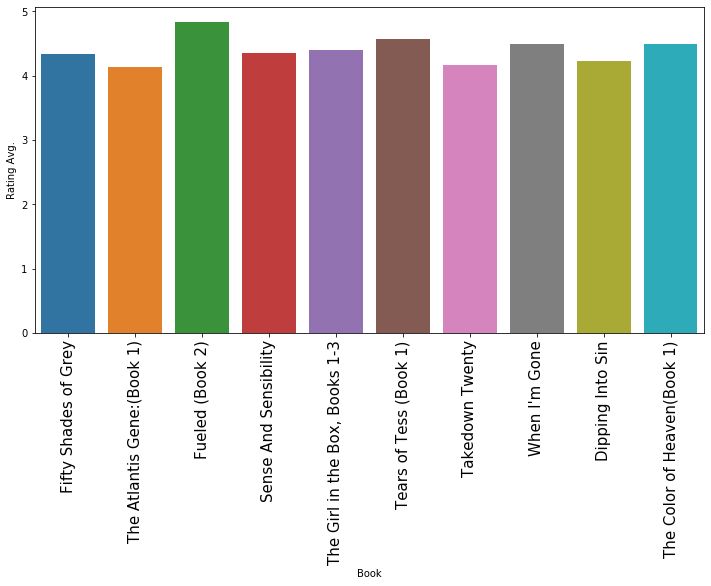

In [298]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Book', y="Rating Avg.",data=df_books)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,size=15)

[Text(0, 0, 'Fifty Shades of Grey'),
 Text(0, 0, 'The Atlantis Gene:(Book 1)'),
 Text(0, 0, 'Fueled (Book 2)'),
 Text(0, 0, 'Sense And Sensibility'),
 Text(0, 0, 'The Girl in the Box, Books 1-3'),
 Text(0, 0, 'Tears of Tess (Book 1)'),
 Text(0, 0, 'Takedown Twenty'),
 Text(0, 0, "When I'm Gone"),
 Text(0, 0, 'Dipping Into Sin'),
 Text(0, 0, 'The Color of Heaven(Book 1)')]

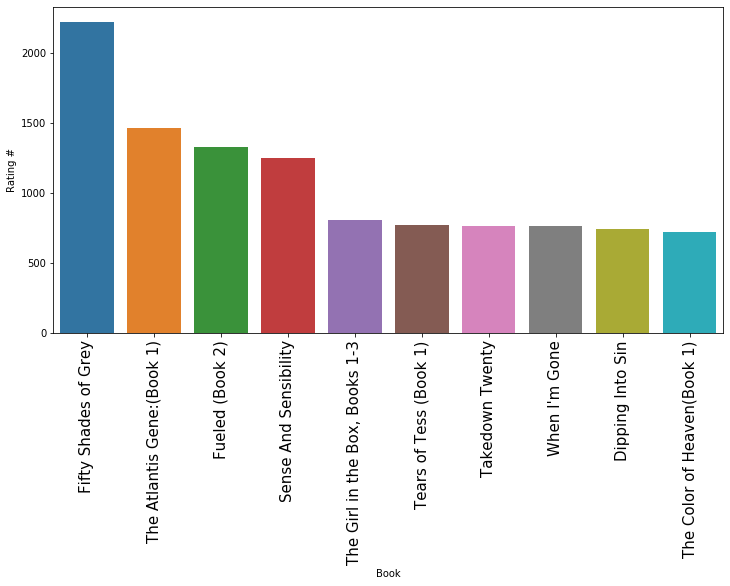

In [307]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Book', y="Rating #",data=df_books)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,size=15)

# Looking at Books According to 'title' Column (based on # of reviews)

In [225]:
df['title'].value_counts().head(10)

Grey: Fifty Shades of Grey as told                                                       2217
Claimed                                                                                  2014
Death                                                                                    1468
The Atlantis Gene: A Thriller (The Origin Mystery, Book 1) - Kindle edition              1461
Fueled (The Driven Series Book 2) - Kindle edition                                       1327
Sense And Sensibility (Annotated                                                         1249
Taken                                                                                    1199
Bound                                                                                     843
The Girl in the Box Series, Books 1-3: Alone, Untouched and Soulless - Kindle edition     808
Tempted                                                                                   784
Name: title, dtype: int64

When I look at the top 10 highest review numbers books, I realized this list is different than book ID's list. When I looked at the details in Amazon.com, I realized that some books have series but as title they were written as same. Also, there are different books with same names. So, finding a title according to Book ID is more reliable way from just looking at titles.

### 'style' Column

In [315]:
df['style'].value_counts()

{'Format:': ' Kindle Edition'}                     2140965
{'Format:': ' Paperback'}                            15887
{'Format:': ' Hardcover'}                             7342
{'Format:': ' Audible Audiobook'}                     2940
{'Format:': ' Mass Market Paperback'}                 2353
{'Format:': ' Audio CD'}                               193
{'Format:': ' Kindle Edition with Audio/Video'}         79
{'Format:': ' MP3 CD'}                                  46
{'Format:': ' Print Magazine'}                          40
{'Format:': ' Board book'}                              31
{'Format:': ' Leather Bound'}                           29
{'Format:': ' Audio Cassette'}                          14
{'Format:': ' Perfect Paperback'}                       13
{'Format:': ' Flexibound'}                               8
{'Format:': ' School & Library Binding'}                 6
{'Format:': ' DVD'}                                      6
{'Format:': ' Library Binding'}                         

Normally, this data is taken from Amazon's Kindle Store pages so, most probably style is written different than Kindle Edition by mistake. But, to make sure(maybe advertised products mixed to the page) about working only with Kindle Store edition of books, I will drop ather styles from my data.

In [322]:
df = df.loc[df['style'] == "{'Format:': ' Kindle Edition'}"] # taking only Kindle edition versions

In [324]:
df['summary'].nunique()

1209555

In [327]:
df['summary'][0]

'pretty good story'

In [328]:
df['reviewText'][0]

'pretty good story, a little exaggerated, but I liked it pretty well.  liked the characters, the plot..it had mystery, action, love, all of the main things. I think most western lovers would injoy this book'

Summary column shows the summary of review. To use this column in recommendation part. I will keep this column.

In [329]:
df['vote'].value_counts().head()

2    126672
3     54121
4     28917
5     17341
6     11148
Name: vote, dtype: int64

In [330]:
df['image'].value_counts().head()

['https://images-na.ssl-images-amazon.com/images/I/51-Fi5BvzbL._SY88.jpg']    9
['https://images-na.ssl-images-amazon.com/images/I/61Rr6pfHbeL._SY88.jpg']    7
['https://images-na.ssl-images-amazon.com/images/I/71eN5U4UQoL._SY88.jpg']    7
['https://images-na.ssl-images-amazon.com/images/I/41JoJPMkZhL._SY88.jpg']    5
['https://images-na.ssl-images-amazon.com/images/I/61usej1mf9L._SY88.jpg']    5
Name: image, dtype: int64

Image and vote columns have too much null values and also I do not need their information so I will drop them.

In [333]:
df.drop(columns=['image','vote'],inplace=True) #droping columns

I will keep review time column for time information so I will drop unix ReviewTime also.

In [335]:
df.drop(columns=['unixReviewTime'],inplace=True) #droping columns

# Word Clouds

Word clouds are the easiest way of looking the most popular or characteristic words in the text. To see the difference of words between positive,negative and neutral reviews, I will build three word clouds.  

In [378]:
df['overall'] = df['overall'].apply(np.int64) #converting from float to integer for creating new columns

In [377]:
df.info(verbose=True, null_counts=True) #to see the # of columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140965 entries, 0 to 2222982
Data columns (total 12 columns):
overall       2140965 non-null int64
verified      2140965 non-null bool
reviewTime    2140965 non-null datetime64[ns]
reviewerID    2140965 non-null object
asin          2140965 non-null object
style         2140965 non-null object
reviewText    2140965 non-null object
summary       2139249 non-null object
title         2125008 non-null object
day           2140965 non-null int64
month         2140965 non-null int64
year          2140965 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(4), object(6)
memory usage: 198.1+ MB


To classify the positive or negative reviews, I will collect 4 and 5 ratingd together as positives and encode them as 2. I will encode rating 3 as 0 and rating 1 and 2 as 1.

In [14]:
def calc_sentiment_with_neutral(overall):
    '''encoding the sentiments of the ratings.'''
    if overall == 5 or overall == 4:
        return 2
    elif overall == 1 or overall==2 : 
        return 0
    else:
        return 1

In [15]:
df['sentiment'] = df['overall'].apply(calc_sentiment_with_neutral) #applyind function

In [391]:
df.groupby(['sentiment','overall']).count()

verified  reviewTime  reviewerID     asin    style  \
sentiment overall                                                       
0         1           45639       45639       45639    45639    45639   
          2           63907       63907       63907    63907    63907   
1         3          189556      189556      189556   189556   189556   
2         4          535714      535714      535714   535714   535714   
          5         1306149     1306149     1306149  1306149  1306149   

                   reviewText  summary    title      day    month     year  
sentiment overall                                                           
0         1             45639    45618    45273    45639    45639    45639  
          2             63907    63877    63485    63907    63907    63907  
1         3            189556   189490   188192   189556   189556   189556  
2         4            535714   535460   531756   535714   535714   535714  
          5           1306149  1304804  1296302  1306149  1306149  1306149

From chart above, we can check how the overall ratings classified and encoded.

In [383]:
df['sentiment'].value_counts() #number of new sentiments

2    1841863
1     189556
0     109546
Name: sentiment, dtype: int64

# Preprocessing the Reviews

For computers, 'Book' is not same word with 'book'. So, I will do every letter in the text lowercase. And, clean the punctuations from text to make them more accurate for my model.

In [10]:
df['reviewText']=df['reviewText'].str.lower() # to make all letters lower

In [433]:
df['reviewText'] #check lower

0          pretty good story, a little exaggerated, but i...
1          if you've read other max brand westerns, you k...
2                               love max, always a fun twist
3                              as usual for him, a good book
4          mb is one of the original western writers and ...
                                 ...                        
2222978    ok book but some parts just didn't add up i fe...
2222979    kia i loved this book.  i am so glad that sky ...
2222980    this picks up where part one left off. secret ...
2222981    what a beautiful ending to such a twisted begi...
2222982    honey let me tell you ms. kia must have been r...
Name: reviewText, Length: 2140965, dtype: object

In [11]:
import string
string.punctuation # to see punctuation library of string function

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [3]:
def remove_punctuation(text):
    '''this function splits the words to letters, remove punctuation and 
        again getting together letters as words '''
    text_no_punc = "".join([c for c in text if c not in string.punctuation])
    return text_no_punc

In [13]:
#removing punctions
df['review_clean'] = df['reviewText'].apply(lambda x: remove_punctuation(x))
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,title,review_clean
0,4.0,True,"07 3, 2014",A2LSKD2H9U8N0J,B000FA5KK0,{'Format:': ' Kindle Edition'},sandra sue marsolek,"pretty good story, a little exaggerated, but i...",pretty good story,1404345600,NaN,NaN,NaN,pretty good story a little exaggerated but i l...
1,5.0,True,"05 26, 2014",A2QP13XTJND1QS,B000FA5KK0,{'Format:': ' Kindle Edition'},Tpl,"if you've read other max brand westerns, you k...",A very good book,1401062400,NaN,NaN,NaN,if youve read other max brand westerns you kno...
2,5.0,True,"09 16, 2016",A8WQ7MAG3HFOZ,B000FA5KK0,{'Format:': ' Kindle Edition'},Alverne F. Anderson,"love max, always a fun twist",Five Stars,1473984000,NaN,NaN,NaN,love max always a fun twist
3,5.0,True,"03 3, 2016",A1E0MODSRYP7O,B000FA5KK0,{'Format:': ' Kindle Edition'},Jeff,"as usual for him, a good book",a good,1456963200,NaN,NaN,NaN,as usual for him a good book
4,5.0,True,"09 10, 2015",AYUTCGVSM1H7T,B000FA5KK0,{'Format:': ' Kindle Edition'},DEHS - EddyRapcon,mb is one of the original western writers and ...,A Western,1441843200,2,NaN,NaN,mb is one of the original western writers and ...


When I look at the clean text and original text, I can check the punctuations were removed.

In [454]:
df['review_clean'][3]

'as usual for him a good book'

In [455]:
df['reviewText'][3]

'as usual for him, a good book'

To compare the most common words in positive, negative and neutral, I will divide dataframe as positive, negative and neutral based on sentiments.

In [16]:
df_pos = df.loc[df['sentiment']==2] # positive reviews dataframe

In [17]:
df_neg = df.loc[df['sentiment']==0] # negative reviews dataframe

In [31]:
df_notr = df.loc[df['sentiment']==1] # neutral reviews dataframe

In [24]:
stop_words = set(STOPWORDS) # setting stop words

In [460]:
# assigning word cloud 
wordcloud = WordCloud(background_color='black', stopwords = stop_words,max_words = 500,
                    max_font_size = 100, random_state = 42, width=800, height=400)

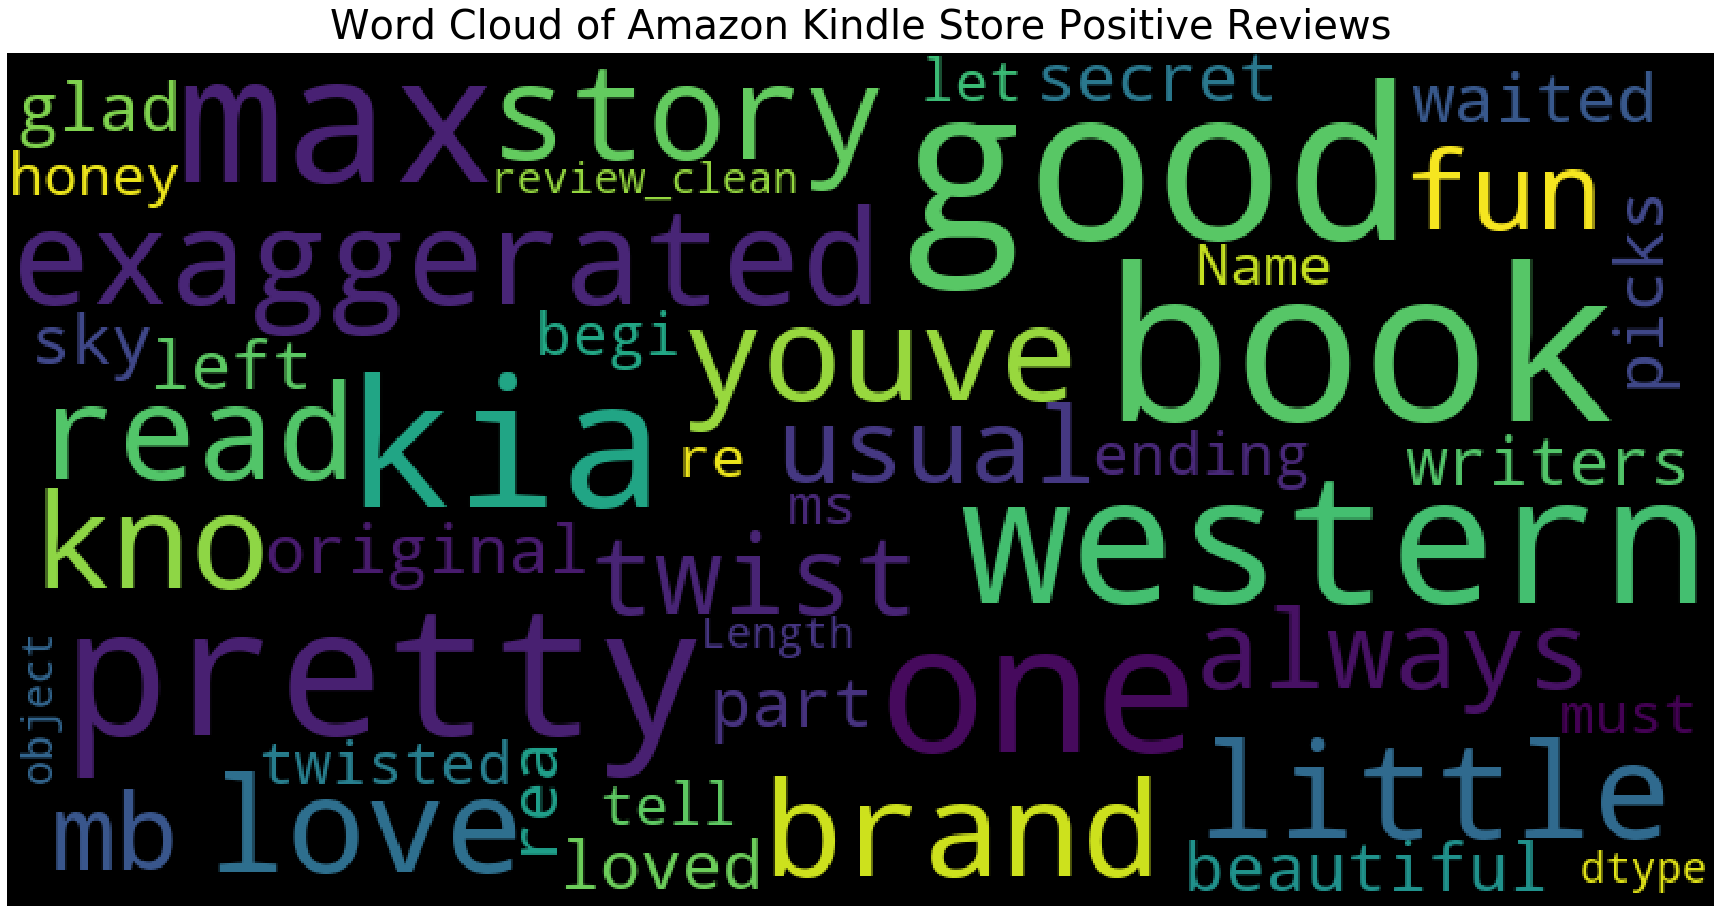

In [461]:
# to see the positive reviews wordcloud
wordcloud.generate(str(df_pos['review_clean']))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Amazon Kindle Store Positive Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

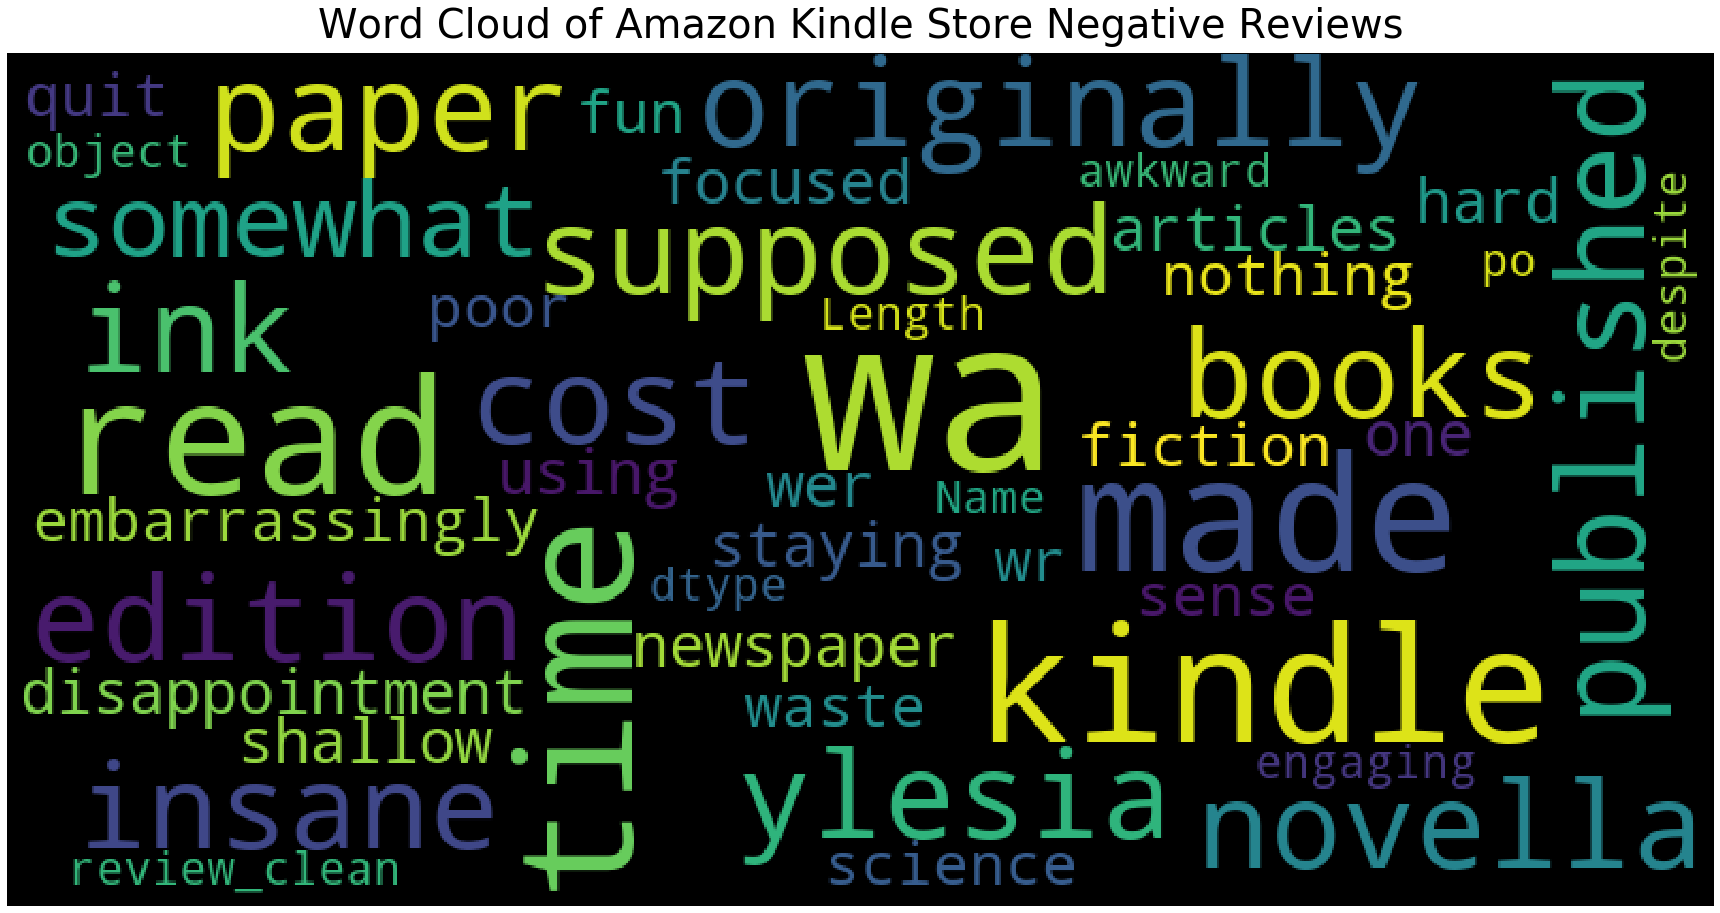

In [462]:
# to see negative wordcloud
wordcloud.generate(str(df_neg['review_clean']))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Amazon Kindle Store Negative Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

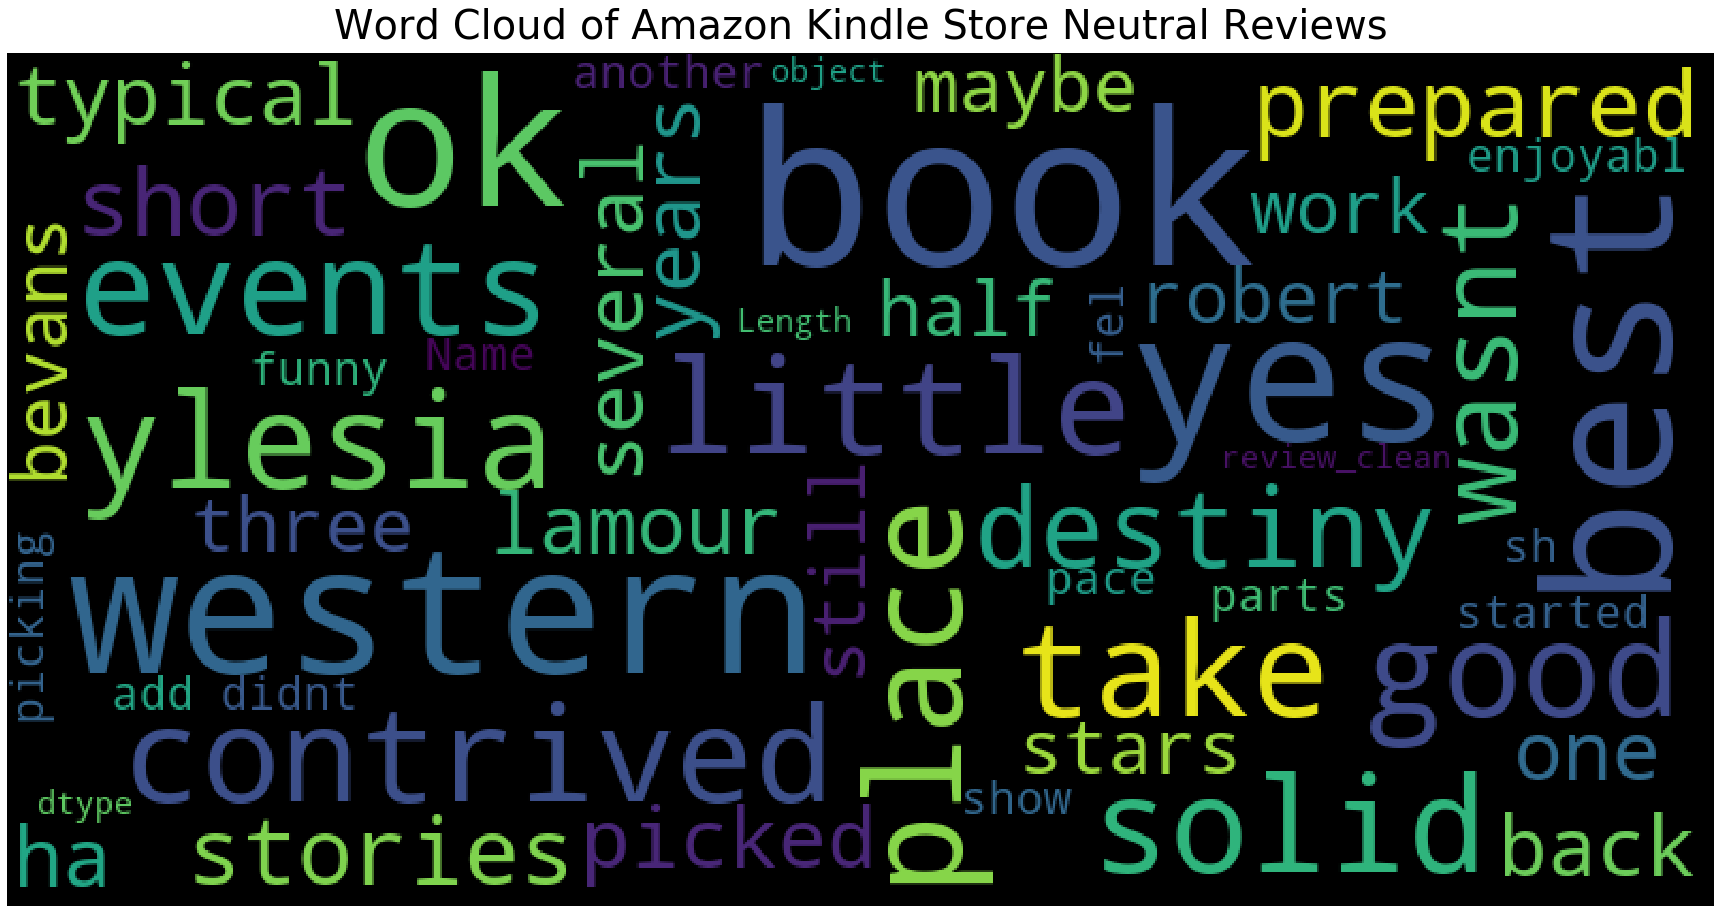

In [465]:
# to see neutral wordcloud
wordcloud.generate(str(df_notr['review_clean']))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Amazon Kindle Store Neutral Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

'Good', 'book', 'love', 'western', 'good' looks bigger it means these are more characteristic words for positive reviews. 'Read', 'time', 'kindle', 'supposed' look characteristic words for negative. For neutral reviews, 'events', 'book', 'western', 'best' look like more characteristic than others. 

# Another Way to Look Most Common Positive and Negative Words

Wordclouds give general idea about what is text about but I need more characteristic words because all words are not in the same text in this data. I will try another method to look common words in positive and negative dataframes.

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/ezgi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
def word_count(reviews):
    '''This function tokenize and count the words in text'''
    word_num={}
    for i in reviews:
        token = nltk.word_tokenize(i)
        for t in token:
            if t not in word_num.keys():
                word_num[t] = 1
            else:
                word_num[t] += 1  
    return word_num

### Top 25 Common Words List in Positive Reviews

In [22]:
word_frequency=word_count(df_pos['review_clean']) #tokenize and count and create dictionary

In [748]:
# to create dataframe from most common words dictionary

df_pos_count = pd.DataFrame(columns=['word', 'count'])
df_pos_count['word'] = word_frequency.keys()
df_pos_count['count'] = list(word_frequency.values())
df_pos_count=df_pos_count.sort_values(by=['count'], ascending=False)
df_pos_count=df_pos_count.reset_index(drop=True)

In [25]:
stop = set(stopwords.words("english")) #setting stopwords

I will create new column as word_without_stop and drop the row if it contains stopwords.

In [751]:
# taking only words which are not stopwords
df_pos_count['word_without_stop'] = df_pos_count['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

In [758]:
# dropping stop words columns
df_pos_without_stop = df_pos_count.dropna(subset=['word_without_stop'])

In [769]:
# taking top 25 words
df_top_25_pos = df_pos_count.loc[df_pos_count['word_without_stop']!=''].head(25)

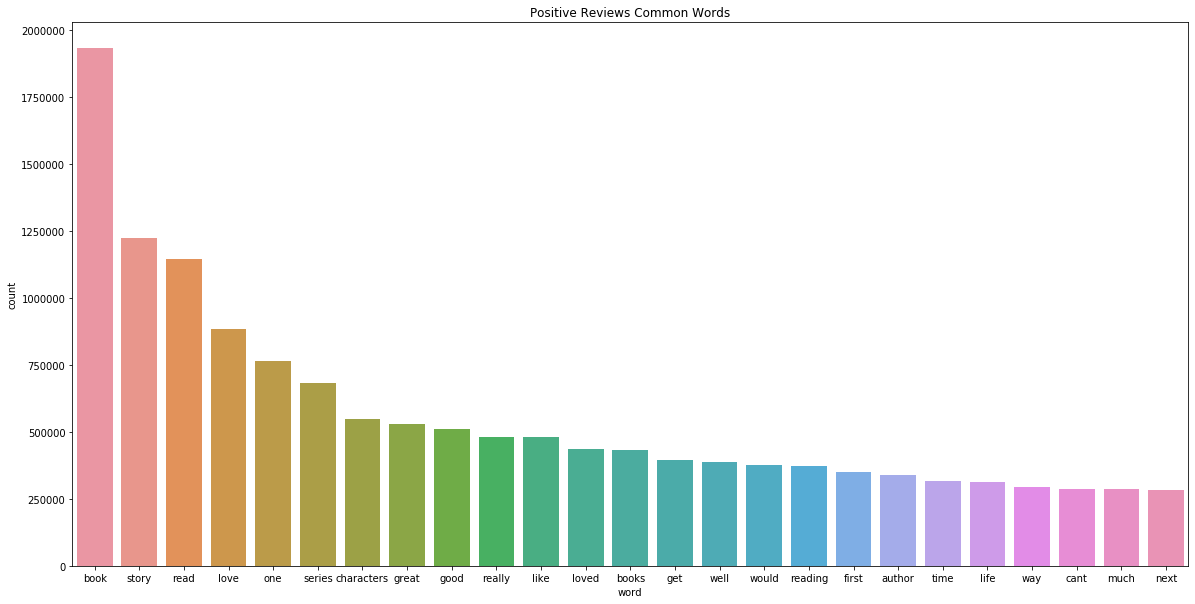

In [778]:
plt.figure(figsize=(20,10))
plt.title('Positive Reviews Common Words')
sns.barplot("word","count", data=df_top_25_pos)

# Top 25 Common Words List in Negative Reviews

I will do same steps with positive words for negative words.

In [779]:
word_frequency_neg=word_count(df_neg['review_clean'])

In [780]:
df_neg_count = pd.DataFrame(columns=['word', 'count'])
df_neg_count['word'] = word_frequency_neg.keys()
df_neg_count['count'] = list(word_frequency_neg.values())
df_neg_count=df_neg_count.sort_values(by=['count'], ascending=False)
df_neg_count=df_neg_count.reset_index(drop=True)


In [781]:
df_neg_count['word_without_stop'] = df_neg_count['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

In [782]:
df_neg_without_stop = df_neg_count.dropna(subset=['word_without_stop'])

In [783]:
df_top_25_neg = df_neg_count.loc[df_neg_count['word_without_stop']!=''].head(25)

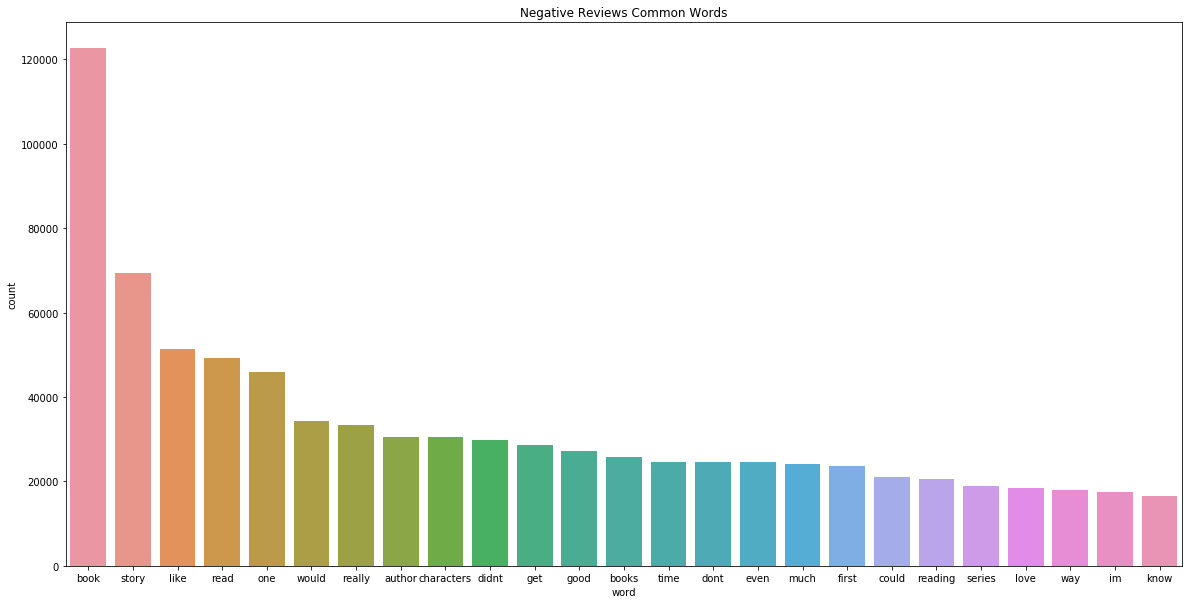

In [791]:
plt.figure(figsize=(20,10))
plt.title('Negative Reviews Common Words')
sns.barplot("word","count", data=df_top_25_neg)

# Top 25 Common Words List in Neutral Reviews

I will do same step with negative and positive for neutral.

In [32]:
word_frequency_notr = word_count(df_notr['review_clean'])

In [33]:
df_nt_count = pd.DataFrame(columns=['word', 'count'])
df_nt_count['word'] = word_frequency_notr.keys()
df_nt_count['count'] = list(word_frequency_notr.values())
df_nt_count=df_nt_count.sort_values(by=['count'], ascending=False)
df_nt_count=df_nt_count.reset_index(drop=True)

In [35]:
df_nt_count['word_without_stop'] = df_nt_count['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

In [36]:
df_nt_without_stop = df_nt_count.dropna(subset=['word_without_stop'])

In [789]:
df_top_25_nt = df_nt_count.loc[df_nt_count['word_without_stop']!=''].head(25)

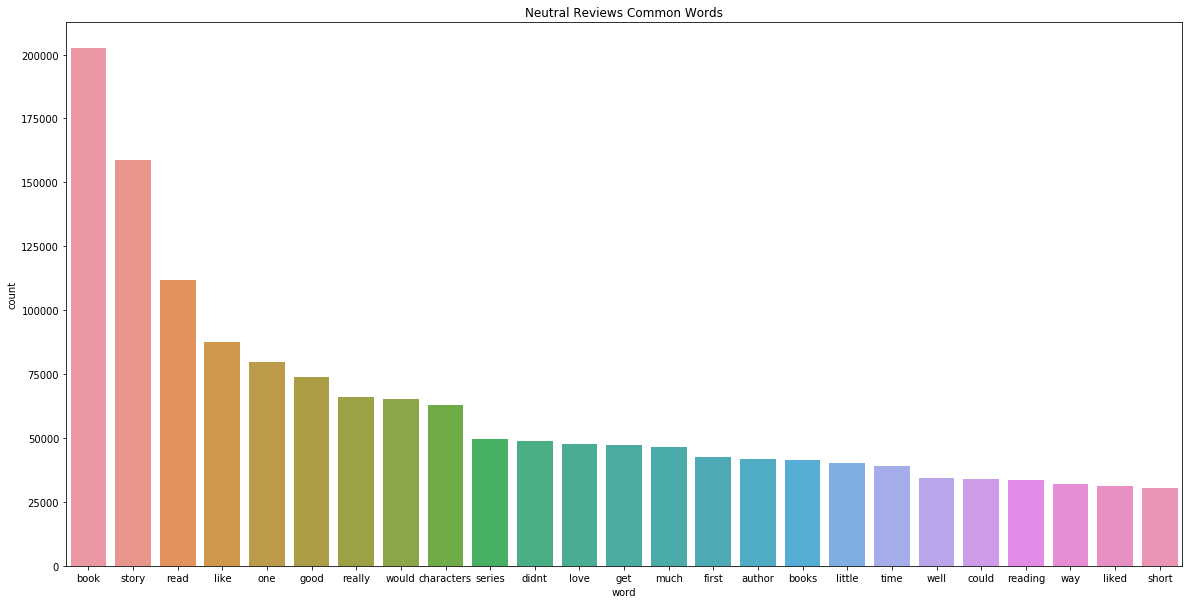

In [792]:
plt.figure(figsize=(20,10))
plt.title('Neutral Reviews Common Words')
sns.barplot("word","count", data=df_top_25_nt)

'book' and 'story' are most common words in 3 dataframe. 'read' is 3rd rank for positive and neutral, but for negative 'like' is in the 3rd rank. Most probably, the reason is that computer counts every word and removes stop words such as 'did not'. If the most common words are 'did not like' for negative, it is counted as 'like'. To handle this problem, I will use bi-grams for modeling which takes the words as couple.

# Simple LogReg 

My aim in this project to use machine learning and deep learning techniques for classifing the text. But, to look at the 3-class target simple model, I will use simple LogReg. 

## Taking Sample and Train-Test Split

My data has more than 2 million rows and it is hard to run each time to find the best model. First problem is my computer's CPU most probably not enough for this. And, second problem is that it takes too much time to run for each model. So, I will use one of the most common techniques in big data and I will take samples from each label class. I will take my sample data balanced from each class, because I want that my model learns more information from also minority class.

In [467]:
df['sentiment'].value_counts()

2    1841863
1     189556
0     109546
Name: sentiment, dtype: int64

### Taking 50000 Samples from Each Class

In [481]:
df_0 = df.loc[df['sentiment']==0].head(50000)

In [482]:
df_1 = df.loc[df['sentiment']==1].head(50000)

In [483]:
df_2 = df.loc[df['sentiment']==2].head(50000)

In [484]:
frames = [df_0, df_1, df_2]
#getting together samples
df_sampled = pd.concat(frames)

In [485]:
df_sampled['sentiment'].value_counts() #sample classes - balanced chosen

2    50000
1    50000
0    50000
Name: sentiment, dtype: int64

In [5]:
def model(df) :
    '''This function splits data to train and test, then vectorized reviews 
        and calculating results from LogReg
    '''
    
    # split train-test
    X_train, X_test, y_train, y_test = train_test_split(df['review_clean'], 
                                                        df['sentiment'], test_size=0.2, random_state=42)
    print(X_train.shape)
    print(X_test.shape)
        
    # define vectorize and fit to data     
    word_vectorizer = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',
        analyzer='word',token_pattern=r'\w{1,}',stop_words='english',
        ngram_range=(1, 1),max_features=10000)

    word_vectorizer.fit(df['review_clean'])
    
    # train - test vectorized features
    train_word_features = word_vectorizer.transform(X_train)
    test_word_features = word_vectorizer.transform(X_test)
     
    # choosing and fitting classifier
    classifier = LogisticRegression(class_weight = "balanced", C=0.5, solver='sag')
    classifier.fit(train_word_features, y_train)
    
    # calculating results 
    y_pred_train = classifier.predict(train_word_features)
    y_pred = classifier.predict(test_word_features)
          
    print("Accuracy:"); print("="*len("Accuracy:"))
    print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {accuracy_score(y_test, y_pred)}")

    print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
    print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {balanced_accuracy_score(y_test, y_pred)}")
    
    # plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)
    plt.show()

(120000,)
(30000,)
Accuracy:
TRAIN: 0.734475
TEST: 0.6961666666666667

Balanced Accuracy:
TRAIN: 0.734360382032222
TEST: 0.6966827113838684


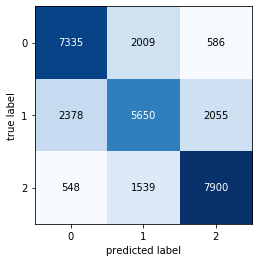

In [486]:
model(df_sampled)

My model is overfit and there is no high accuracy which I want. I can tune this model to handle this but my aim in this project is to determine negative reviews mostly and for doing this I will try also deep learning models. I did LogReg just for first idea. So, I drop this here and continue with binary class machine learning and deep learning models which can be found in this [repo](https://github.com/ezgigm/sentiment_analysis_and_product_recommendation/tree/master/notebooks).

In [715]:
df.to_csv('cleaned_data.csv', index = False) # to keep merged,preprocessed and cleaned version

# Findings and Explorations

## Cleaning Process

- The data has lots of null values for some features, and some unnecessary columns for modeling. Our main column is 'reviewText' column so I dropped the nulls for this column.
- Unnecessary columns were dropped such as image, vote etc.
- Upper case letters were changed to lower case in reviews and punctuations were cleaned. 
- The rows which style's are different than Kindle edition were deleted.

## Explorations & Findings

- There are more than 2 million reviews with their ratings in my data.
- Data consists of 139815 user and 98824 books mainly. 
- 64% of reviews were not verified by Amazon, but fake review detection is not the topic of this project so I assumed that all of the reviews will be approved by Amazon. 
- My target is highly imbalanced with 4 and 5 ratings are significantly higher than others.
- Although data was obtained from 1997 to 2018, most of the data points belongs to recent years especially aftert 2012. High percentage of data belongs to 2014, 2015 and 2016.
- Data contains balanced points for each day and month. Distribution of the labels also looks similar for each month.
- Top users according to review numbers generally rated books more than 3.
- Although, some books has 5 rating average, their review numbers are less so instead of looking rating average, I preferred to look highly reviewed book. 
- Top reviewed book is Fifty Shades of Grey with 2217 reviews and 4.34 rating average in my data. 
- The most common words in 4 and 5 rated books are 'book, story, read, love, one, series, characters, great'.
- The most common words in 1 and 2 rated books are 'book, story, like, read, one, would, really, author'.
- The most common words in 3 rated books are 'book, story, read, like, one, good, really, would'.
- Mostly common words are same in each rated segments, but ranks are different. Some negative words such as didnt and dont are in the most common words in negative reviews dataframe different than positive reviews dataframe. 
- 'could' and 'would' also have higher ranks in negative reviews than positive reviews. The reason can be that they could be commonly in reviews with 'not'.

## Feature Engineering

- Bi-grams and Tri-grams will be added to our model in next notebook. 